### 首先运行使用的库

In [1]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

## 第一、二问 读取MoviesLens 1M数据，存储为Pandas的DataFrame； 将DataFrame数据改为自己代码所需要的结构；

In [2]:
# 用户信息（users.dat表，数据无表目信息）
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']  #用户名::性别：年龄::职业::邮政编码
users = pd.read_table('data/users.dat', sep='::', header=None, names=unames, engine='python')
#评分信息
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']     #用户名:: MovieID ::评级::时间戳
ratings = pd.read_table('data/ratings.dat', sep='::', header=None, names=rnames, engine='python')
#电影信息
mnames = ['movie_id', 'title', 'genres']                    #MovieID ::标题::流派
movies = pd.read_table('data/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


## 第三题 学习协同过滤算法，写出协同过滤算法相应的函数；
###            输入为两个用户 输出为这个两个用户的相似度

In [4]:
def collaboratIve_filtering(user_ID_1,user_ID_2):
    #处理数据 得到一个result 只包含两个用户对不同电影的评分
    t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
    t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
    id_1 = 'ratingofID_' + str(user_ID_1)
    id_2 = 'ratingofID_' + str(user_ID_2)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
    x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  
    
    #下面为对处理好的数据 计算欧式距离
    distances = result[id_1].sub(result[id_2], fill_value = 0)  #两个Series 即两个用户对不同电影评分 相减
    div = ((distances**2).values.sum())**0.5    #div 为欧式距离
    sim = 1/(1+div)   #表示相似度
    return sim

### 以下为此函数的测试 以用户id = 1， id =2 为例，实例在测试后。

In [5]:
t1 = ratings.loc[ratings['user_id'] == 1]   #取出每一个名字的 DataFrame 如上
t2 = ratings.loc[ratings['user_id'] == 2]   #取出每一个名字的 DataFrame 如上

### 这里修改了Dataframe 的列名用用户的ID来当 评分的索引，以免出现多个用户的评分的索引相同，警告为修改列名

In [6]:
t1=t1.rename(columns={'rating':'ratingofID_1'}, inplace = False)  #修改列名
t2=t2.rename(columns={'rating':'ratingofID_2'}, inplace = False)  #修改列名

In [7]:
x1 = t1.groupby('movie_id').sum()
f1 = x1.drop(['user_id','timestamp'],axis =1)
x2 = t2.groupby('movie_id').sum()
f2 = x2.drop(['user_id','timestamp'],axis = 1)

In [8]:
result=pd.concat([f1,f2],sort=True,axis = 1)  #合并Frame  注意axis = 1 
result

,ratingofID_1,ratingofID_2
movie_id,,
1,5.0,NaN
21,NaN,1.0
48,5.0,NaN
95,NaN,2.0
110,NaN,5.0
150,5.0,NaN
163,NaN,4.0
165,NaN,3.0
235,NaN,3.0


### 下面为计算欧几里德距离 ：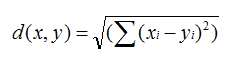

In [9]:
distances = result['ratingofID_1'].sub(result['ratingofID_2'], fill_value = 0)  #两个Series 即两个用户对不同电影评分 相减
div = ((distances**2).values.sum())**0.5          

### 计算相似度 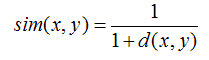

In [10]:
sim = 1/(1+div)
sim

0.019230769230769232

#### 直接调用函数的实例    与测试运算结果一致

In [12]:
sim = collaboratIve_filtering(1,2)
sim

0.019230769230769232

## 第四题 输入两个用户，输出两个用户公共电影的评分；

In [13]:
user1 = input("输入用户1的ID ：")
user2 = input("输入用户2的ID ：")

输入用户1的ID ：1
输入用户2的ID ：2000


### 对两个用户的数据采取同第三题的相同的处理方式

In [14]:
def common_rating(user_ID_1,user_ID_2):
    #处理数据 得到一个result 只包含两个用户对不同电影的评分
    t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
    t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
    id_1 = 'ratingofID_' + str(user_ID_1)
    id_2 = 'ratingofID_' + str(user_ID_2)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
    x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  
    
    #这里为删除两个用户 含有NaN的数据 即有一方用户没有看过的电影  得到的结果为两个用户共同看过的电影
    common = result.dropna(axis=0,how='any')
    return print(common)

### 以下为函数 的测试

In [21]:
user_ID_1 = 1;
user_ID_2 = 2000;

In [22]:
t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
id_1 = 'ratingofID_' + str(user_ID_1)
id_2 = 'ratingofID_' + str(user_ID_2)
t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
f1 = x1.drop(['user_id','timestamp'],axis =1)
x2 = t2.groupby('movie_id').sum()
f2 = x2.drop(['user_id','timestamp'],axis = 1)
result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  

In [23]:
result

,ratingofID_1,ratingofID_2000
movie_id,,
1,5.0,4.0
24,NaN,4.0
34,NaN,4.0
48,5.0,NaN
50,NaN,4.0
110,NaN,5.0
150,5.0,3.0
239,NaN,4.0
260,4.0,4.0


In [24]:
result.dropna(axis=0,how='any')

,ratingofID_1,ratingofID_2000
movie_id,,
1,5.0,4.0
150,5.0,3.0
260,4.0,4.0
527,5.0,5.0
595,5.0,5.0
783,4.0,4.0
1193,5.0,5.0
1721,4.0,4.0
1907,4.0,5.0


### 函数运行结果

In [20]:
common_rating(1,2000)

          ratingofID_1  ratingofID_2000
movie_id                               
1                  5.0              4.0
150                5.0              3.0
260                4.0              4.0
527                5.0              5.0
595                5.0              5.0
783                4.0              4.0
1193               5.0              5.0
1721               4.0              4.0
1907               4.0              5.0
2028               5.0              5.0
2294               4.0              4.0
2321               3.0              5.0
2355               5.0              4.0
2762               4.0              4.0
2791               4.0              3.0
2804               5.0              5.0
3408               4.0              4.0


## 第五题 输入两个用户，计算出用户偏好的相似度；

### 直接调用协同过滤算法的函数 返回两个用户的相似度

In [25]:
user1 = int(input("输入用户1的ID ："))
user2 = int(input("输入用户2的ID ："))

输入用户1的ID ：1
输入用户2的ID ：2000


In [26]:
print("ID为： ",user1, "的用户 与ID为： ", user2 , "的用户的相似度为：",collaboratIve_filtering(user1,user2))

ID为：  1 的用户 与ID为：  2000 的用户的相似度为： 0.02307133410685282


## 第六题 输入一位用户，输出与指定用户相似度最高的5位用户；

In [27]:
user3 = input("输入用户3 的ID：")

输入用户3 的ID：1


### 计算每个用户与user3的相似度 时间较长

In [29]:
def getSimilarity(user3):  #得到相似度的函数  返回一个Series 储存除user3 的所有用户 与user3 的相似度
    Similarity = Series() 
    for user in  ratings['user_id'].unique():    #通过遍历除了user3 自己以外的所有userid  然后一一计算 出他们的相似度 储存在commonUserSeries中
        if(int(user) == int(user3)):  #如果与user3 id相同 即便利到自己
            pass
        else:
            Similarity[str(user)] = collaboratIve_filtering(int(user3),int(user))
    return Similarity;

In [30]:
commonUserSeries = getSimilarity(user3); # 一个实例

#### 计算后的结果

In [31]:
commonUserSeries

2       0.019231
3       0.024655
4       0.028241
5       0.018216
6       0.023605
7       0.025504
8       0.018653
9       0.022122
10      0.012071
11      0.020258
12      0.028195
13      0.021947
14      0.028092
15      0.017779
16      0.027212
17      0.015351
18      0.014629
19      0.016163
20      0.026689
21      0.029718
22      0.016112
23      0.015104
24      0.018947
25      0.022267
26      0.014848
27      0.021121
28      0.021208
29      0.020233
30      0.027945
31      0.019329
          ...   
6011    0.016407
6012    0.028464
6013    0.019631
6014    0.021237
6015    0.026030
6016    0.010002
6017    0.027109
6018    0.018203
6019    0.021436
6020    0.023160
6021    0.020755
6022    0.026797
6023    0.018626
6024    0.020417
6025    0.015904
6026    0.022421
6027    0.025327
6028    0.025186
6029    0.026718
6030    0.019080
6031    0.025615
6032    0.019162
6033    0.023288
6034    0.027150
6035    0.017530
6036    0.009718
6037    0.016752
6038    0.0273

In [32]:
commonUserSeries.sort_values(ascending = False)[0:5]  #对commonUserSeries 按值进行降序排列 后取最前五位

1283    0.031140
5190    0.031094
5320    0.031032
3598    0.030833
4486    0.030506
dtype: float64

In [33]:
print("与"+str(user3)+"相似度最高的五位用户的ID为：")  #输出
for i in range(5):
    print(commonUserSeries.sort_values(ascending = False)[0:5].index[i])

与1相似度最高的五位用户的ID为：
1283
5190
5320
3598
4486


## 第七题 输入一位用户，输出输出推荐电影；

In [34]:
user4 = input("输入用户4 的ID：") #时间较长

输入用户4 的ID：1


### 输入用户id 返回一个给此用户推荐电影的 top10 的列表

In [36]:
def recommendedMovies(user):
    user4Similarity = getSimilarity(user);     #得到与user4用户作对比 其他所有用户的的相似度Series
    top1 = user4Similarity.sort_values(ascending = False)[0:1].index[0]  #与user4 最 相似用户的ID 
    t1 = ratings.loc[ratings['user_id'] == int(user)]   
    t2 = ratings.loc[ratings['user_id'] == int(top1)]  
    id_1 = 'ratingofID_' + str(user)
    id_2 = 'ratingofID_' + str(top1)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  
    x1 = t1.groupby('movie_id').sum()                      
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1 
#---------以上为处理数据 --------------------------------------------------------------------
    user4IsNan = result.loc[result[str(id_1)].isnull()] #user4 没有评论的电影 而 top1看过的电影
    onlyTop1 = user4IsNan.drop([str(id_1)],axis = 1)    #删除user4 的列 
    goodMovieOfTop1 = onlyTop1.loc[onlyTop1[str(id_2)] >= 3]  #在top1 中 评分大于等于3的电影
    goodMovieOfTop1[id_2].sort_values(ascending = False)    #排序 使评分高 在评分低电影上面
    moviesList = []    #存储推荐电影的列表   
    print("为用户"+ str(user4)+"推荐的电影如下：")
    for i in range(10):
        moiveID = goodMovieOfTop1[id_2].sort_values(ascending = False).index[i]   #从goodMovieOfTop1 的index中取得推荐电影的ID
        moviesList.append(movies.loc[movies['movie_id'] == moiveID]['title'].values[0]) # 从movies DataFrame 中取得推荐电影的列表
        print(moviesList[i]);
    return  moviesList;

### 下面为此函数分步解释

In [92]:
user4Similarity = getSimilarity(user4);     #得到与user4用户作对比 其他所有用户的的相似度Series
top1 = user4Similarity.sort_values(ascending = False)[0:1].index[0]  #与user4 最 相似用户的ID 

#### 处理数据

In [103]:
    t1 = ratings.loc[ratings['user_id'] == int(user4)]   #取出ID 等于 user1 的DataFrame
    t2 = ratings.loc[ratings['user_id'] == int(top1)]   #同上
    id_1 = 'ratingofID_' + str(user4)
    id_2 = 'ratingofID_' + str(top1)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
    x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1 

In [115]:
result

,ratingofID_1,ratingofID_1283
movie_id,,
1,5.0,5.0
47,NaN,4.0
48,5.0,NaN
110,NaN,5.0
150,5.0,NaN
168,NaN,4.0
260,4.0,2.0
296,NaN,1.0
356,NaN,4.0


In [141]:
user4IsNan = result.loc[result[str(id_1)].isnull()] #user4 没有评论的电影 而 top1看过的电影
onlyTop1 = user4IsNan.drop([str(id_1)],axis = 1)    #删除user4 的列 
goodMovieOfTop1 = onlyTop1.loc[onlyTop1[str(id_2)] >= 3]  #在top1 中 评分大于等于3的电影
goodMovieOfTop1[id_2].sort_values(ascending = False)    #排序 使评分高 在评分低电影上面

movie_id
597     5.0
110     5.0
539     5.0
2396    5.0
910     4.0
168     4.0
356     4.0
480     4.0
3536    4.0
1393    4.0
2059    4.0
2125    4.0
47      4.0
593     3.0
1407    3.0
1784    3.0
364     3.0
2081    3.0
Name: ratingofID_1283, dtype: float64

In [144]:
goodMovieOfTop1[id_2].sort_values(ascending = False).index 

Int64Index([ 597,  110,  539, 2396,  910,  168,  356,  480, 3536, 1393, 2059,
            2125,   47,  593, 1407, 1784,  364, 2081],
           dtype='int64', name='movie_id')

In [147]:
moviesList = []
for i in range(10):
    moiveID = goodMovieOfTop1[id_2].sort_values(ascending = False).index[i]      #从goodMovieOfTop1 的index中取得推荐电影的ID
    moviesList.append(movies.loc[movies['movie_id'] == moiveID]['title'].values[0])   # 从movies DataFrame 中取得推荐电影的列表

In [148]:
moviesList

['Pretty Woman (1990)',
 'Braveheart (1995)',
 'Sleepless in Seattle (1993)',
 'Shakespeare in Love (1998)',
 'Some Like It Hot (1959)',
 'First Knight (1995)',
 'Forrest Gump (1994)',
 'Jurassic Park (1993)',
 'Keeping the Faith (2000)',
 'Jerry Maguire (1996)']

In [151]:
print("为用户"+ str(user4)+"推荐的电影如下：")
print(moviesList)

为用户1推荐的电影如下：
['Pretty Woman (1990)', 'Braveheart (1995)', 'Sleepless in Seattle (1993)', 'Shakespeare in Love (1998)', 'Some Like It Hot (1959)', 'First Knight (1995)', 'Forrest Gump (1994)', 'Jurassic Park (1993)', 'Keeping the Faith (2000)', 'Jerry Maguire (1996)']


### 实例如下：

In [37]:
recommendedMovies(user4)

为用户1推荐的电影如下：
Pretty Woman (1990)
Braveheart (1995)
Sleepless in Seattle (1993)
Shakespeare in Love (1998)
Some Like It Hot (1959)
First Knight (1995)
Forrest Gump (1994)
Jurassic Park (1993)
Keeping the Faith (2000)
Jerry Maguire (1996)


['Pretty Woman (1990)',
 'Braveheart (1995)',
 'Sleepless in Seattle (1993)',
 'Shakespeare in Love (1998)',
 'Some Like It Hot (1959)',
 'First Knight (1995)',
 'Forrest Gump (1994)',
 'Jurassic Park (1993)',
 'Keeping the Faith (2000)',
 'Jerry Maguire (1996)']